# Smoothing Time-series
Feb 22nd 2022

In [4]:
import sys
print(sys.executable)
import numpy as np
import pandas as pd
import os
print(os.getcwd())
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels as ss
# Advanced smoothing techniques:
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.metrics import mean_squared_error
SEED= 42

/home/razielar/miniconda3/envs/time-series/bin/python
/home/razielar/Documents/git_rep/Machine_learning/time_series_forecasting/coursera_time_series_forecasting/time_series_analysis/week_2/2_time_series_smoothing


In [5]:
# Custom functions
import src.colorsetup
from src.timeseriesFunctions import plot_time_series, chunks_statistics

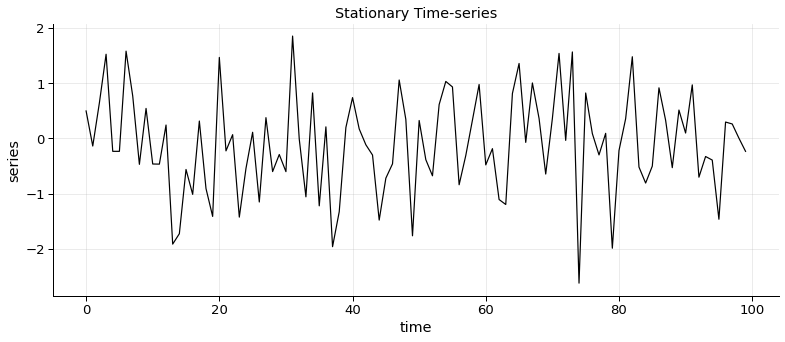

In [6]:
np.random.seed(SEED)

time= np.arange(100)
stationarity= np.random.normal(loc= 0, scale= 1.0, size= len(time))
plot_time_series(time, stationarity, title= "Stationary Time-series")

## Smoothing techniques in this nb
* 1) Simple smoothing (average)
* 2) MA= moving average (equally-weighted and exponentially-weighted)
* 3) Exponential Smoothing (single exponential smoothing, double and triple exponential smoothing)

## 1) Simple smoothing (average)

MSE: 0.8165


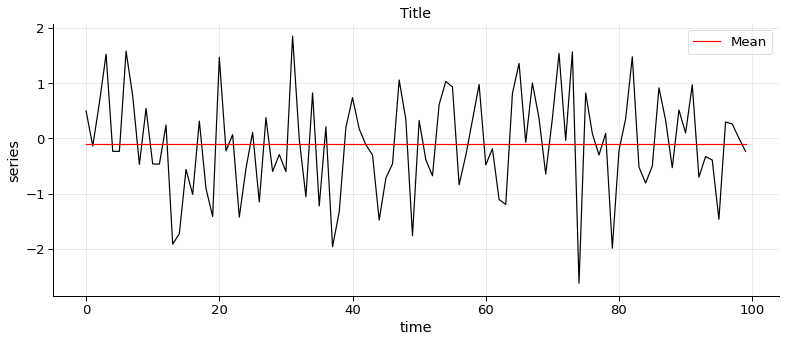

In [7]:
stationary_av= np.mean(stationarity)
sts_avg= np.full(shape= len(time), fill_value= stationary_av, dtype= 'float')
print("MSE: {:.4f}".format(mean_squared_error(stationarity, sts_avg))) 
plot_time_series(time, stationarity)
plt.plot(time, sts_avg, label= "Mean", color= "red")
plt.legend()
plt.show()

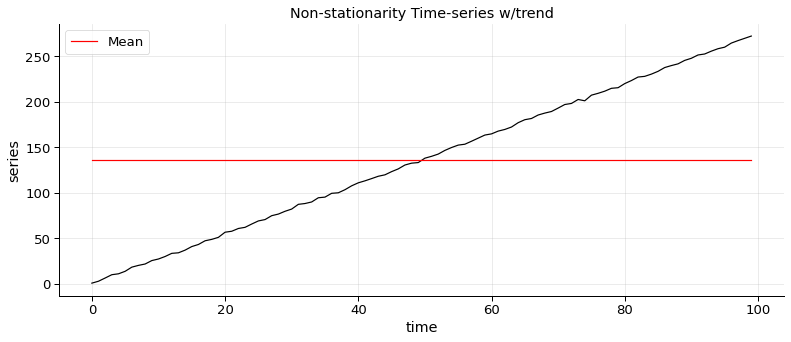

In [8]:
# Trend
trend= (time * 2.75) + stationarity
trend_avg= np.full(shape= len(time), fill_value= np.mean(trend), dtype= "float")
plot_time_series(time, trend, title= "Non-stationarity Time-series w/trend")
plt.plot(time, trend_avg, color= "red", label= "Mean")
plt.legend()
plt.show()

## 2) Moving Average (MA)

In [9]:
def moving_average(observations, window= 3, forecast= False):
    """Returns the smoothed version of an array of observations"""
    cum_sum= np.cumsum(observations, dtype= "float")
    cum_sum[window:] = cum_sum[window:] - cum_sum[:-window]
    if forecast:
        return np.insert(cum_sum[window-1:] / window, 0, np.zeros(3))
    else:
        return cum_sum[window -1:] / window

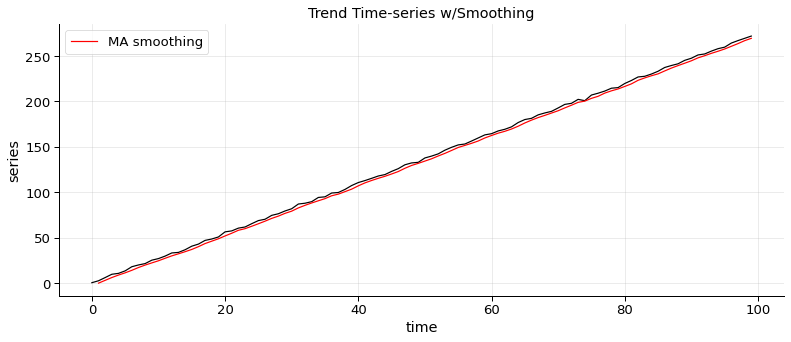

In [10]:
smoothed_trend= moving_average(trend)
plot_time_series(time, trend, title= "Trend Time-series w/Smoothing")
plt.plot(time[1:], np.insert(smoothed_trend, 0, 0), color= "red", label= "MA smoothing")
plt.legend()
plt.show()

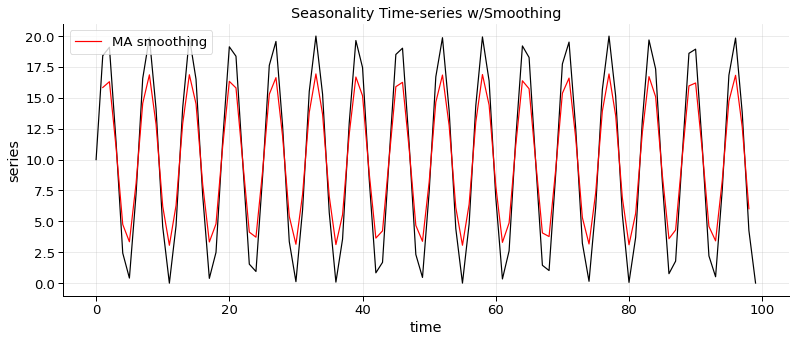

In [11]:
seasonality= 10 + np.sin(time) * 10
smoothed_seasonality= moving_average(seasonality)
plot_time_series(time, seasonality, title= "Seasonality Time-series w/Smoothing")
plt.plot(time[1:-1], smoothed_seasonality, label= "MA smoothing", color= "red")
plt.legend(loc= "upper left")
plt.show()

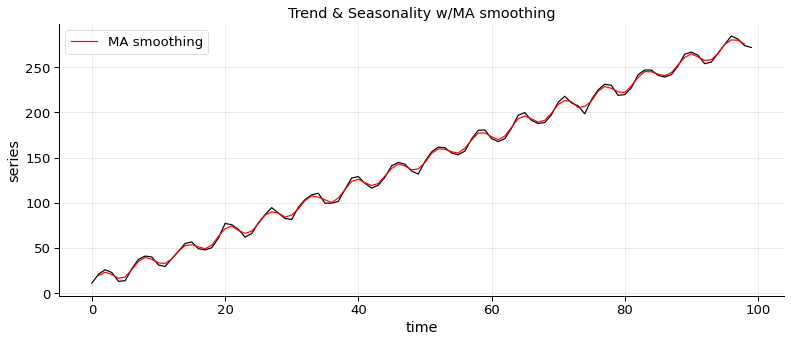

In [12]:
trend_seasonality= trend + seasonality + stationarity
smoothed_trend_seasonality= moving_average(trend_seasonality)
plot_time_series(time, trend_seasonality, title= "Trend & Seasonality w/MA smoothing")
plt.plot(time[1:-1], smoothed_trend_seasonality, color= "red", label= "MA smoothing")
plt.legend()
plt.show()

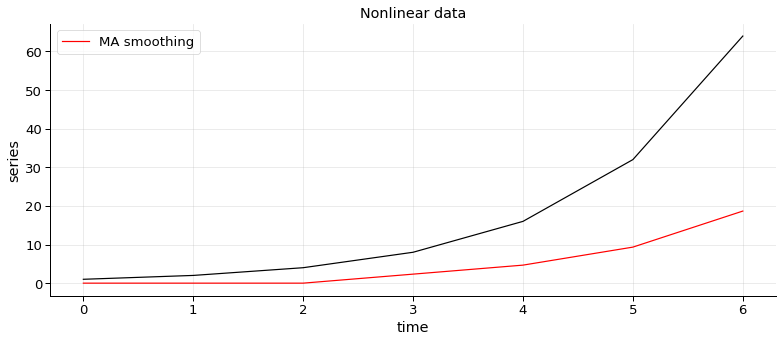

In [13]:
values= np.array([1,2,4,8,16,32,64])
ma_smoothed= moving_average(values, window= 3, forecast= True)
t= np.arange(len(values))
plot_time_series(t, values, title= "Nonlinear data")
plt.plot(t, ma_smoothed[:-1], color= "red", label= "MA smoothing")
plt.legend()
plt.show()

## 3) Advanced Smoothing
* 1) **Single Exponential Smoothing**: smooth values
* 2) **Double Exponential Smoothing**: smooth values and trend
* 3) **Triple Expnential Smoothing**: smooth values, trend and seasonality

In [14]:
print("Complete TS: {}".format(len(trend_seasonality)))
train= trend_seasonality[:-5]
print("Train: {}".format(len(train)))
test= trend_seasonality[-5:]
print("Test: {}".format(len(test)))

Complete TS: 100
Train: 95
Test: 5


### 3.1) Single Exponential Smoothing

MSE: 166.00


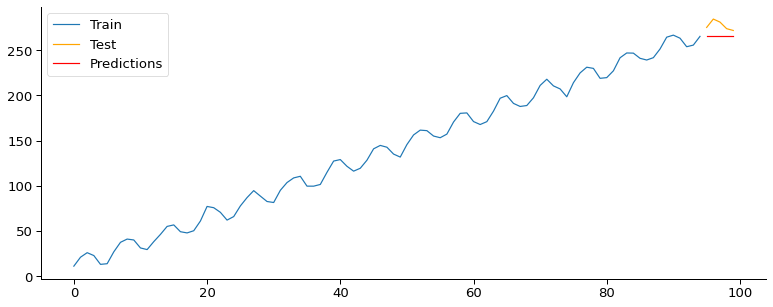

In [15]:
single= SimpleExpSmoothing(train).fit(optimized= True)
single_pred= single.forecast(len(test))
single_mse= mean_squared_error(test, single_pred)
print("MSE: {:.2f}".format(single_mse))
# Plot: 
plt.plot(time[:-5], train, label= "Train")
plt.plot(time[-5:], test, label= "Test", color= "orange")
plt.plot(time[-5:], single_pred, label= "Predictions", color= "red")
plt.legend()
plt.show()

### 3.2) Double Exponential Smoothing

MSE: 70.86


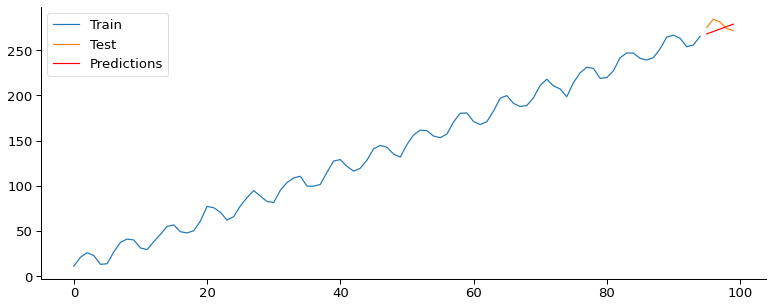

In [16]:
double= Holt(train).fit(optimized= True)
double_pred= double.forecast(len(test))
double_mse= mean_squared_error(test, double_pred)
print("MSE: {:.2f}".format(double_mse))
# Plot:
plt.plot(time[:-5], train, label= "Train")
plt.plot(time[-5:], test, label= "Test")
plt.plot(time[-5:], double_pred, label= "Predictions", color= "red")
plt.legend()
plt.show()

### 3.3) Triple Exponential

MSE: 5.41


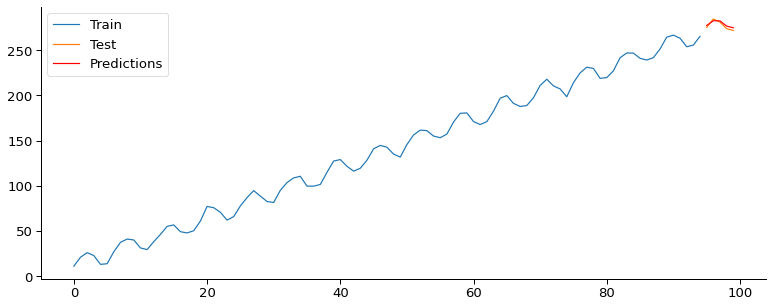

In [17]:
triple= ExponentialSmoothing(train, trend= "additive", seasonal= "additive", seasonal_periods= 13).fit(optimized= True)
triple_pred= triple.forecast(len(test))
triple_mse= mean_squared_error(test, triple_pred)
print("MSE: {:.2f}".format(triple_mse))
# Plot:
plt.plot(time[:-5], train, label= "Train")
plt.plot(time[-5:], test, label= "Test")
plt.plot(time[-5:], triple_pred, label= "Predictions", color= "red")
plt.legend()
plt.show()

In [18]:
data_dict= {"MSE": [single_mse, double_mse, triple_mse]}
pd.DataFrame(data_dict, index= ["Single", "Double", "Triple"])

,MSE
Single,166.00
Double,70.86
Triple,5.41


# Exercises

In [19]:
path= "../course_data/time_series_smoothing/"
smooth_1= np.load(path+ "smooth_1.npy")
smooth_2= np.load(path + "smooth_2.npy")
mytime= np.arange(len(smooth_1))

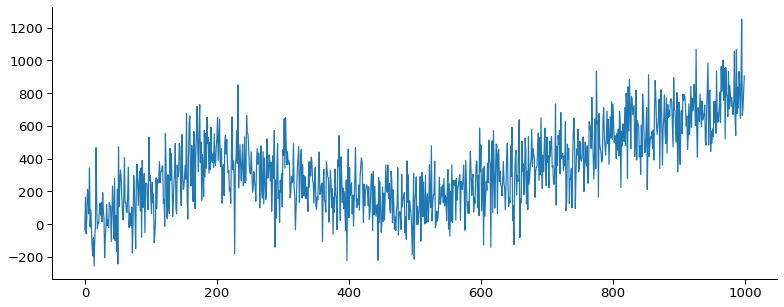

In [20]:
plt.plot(smooth_1)
plt.show()

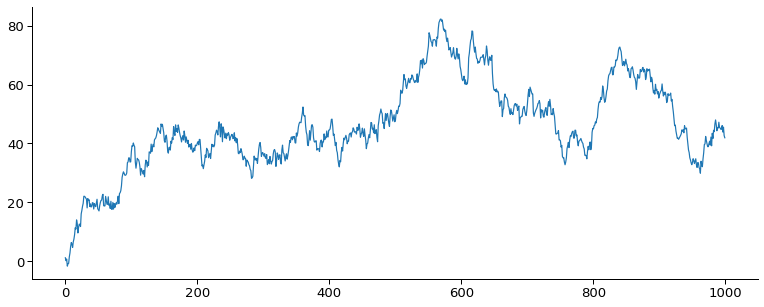

In [21]:
plt.plot(smooth_2)
plt.show()

Train/test split

In [22]:
print("Dataset lenght: {}".format(len(smooth_1)))
test_size= 100
train_1= smooth_1[:-test_size]
train_2= smooth_2[:-test_size]
print("Train size: {}".format(len(train_1)))
test_1= smooth_1[-test_size:]
test_2= smooth_2[-test_size:]
print("Test size: {}".format(len(test_1)))

Dataset lenght: 1000
Train size: 900
Test size: 100


In [23]:
model_1 = ExponentialSmoothing(train_1, damped_trend=True,
                              trend="additive",
                              seasonal=None,
                              seasonal_periods=None).fit(optimized=True)

model_2 = ExponentialSmoothing(train_2,
                              trend=None,
                              seasonal=None,
                              seasonal_periods=None).fit(optimized=True)

preds_1 = model_1.forecast(len(test_2))
preds_2 = model_2.forecast(len(test_2))

In [24]:
mse_1= mean_squared_error(test_1, preds_1)
mse_2= mean_squared_error(test_2, preds_2)
print("MSE 1: {:.4f}\nMSE 2: {:.4f}".format(mse_1, mse_2))

MSE 1: 29606.4262
MSE 2: 196.7839


Plot train, test and forecast

MSE 1: 29606.43


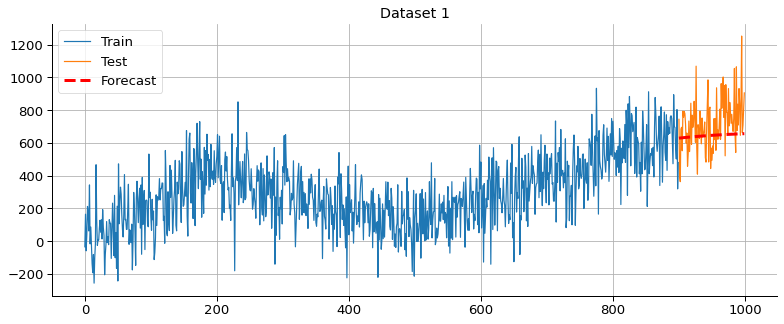

In [25]:
# Dataset 1:
print("MSE 1: {:.2f}".format(mse_1))
plt.plot(mytime[:-test_size], train_1, label= "Train")
plt.plot(mytime[-test_size:], test_1, label= "Test")
plt.plot(mytime[-test_size:], preds_1, 'r--',label= "Forecast", linewidth= 3)
plt.title("Dataset 1")
plt.legend()
plt.grid()
plt.show()

MSE 2: 196.78


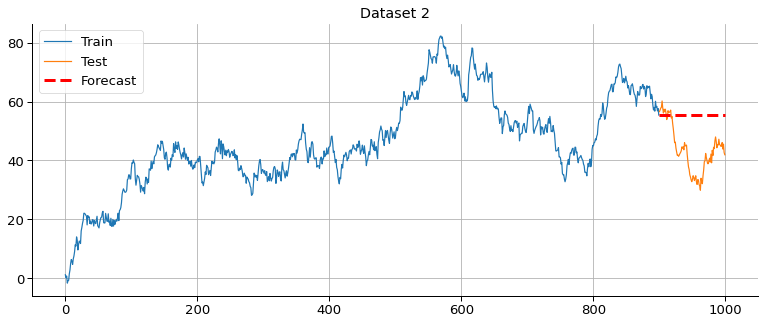

In [26]:
print("MSE 2: {:.2f}".format(mse_2))
plt.plot(mytime[:-test_size], train_2, label= "Train")
plt.plot(mytime[-test_size:], test_2, label= "Test")
plt.plot(mytime[-test_size:], preds_2, 'r--', label= "Forecast", linewidth= 3)
plt.title("Dataset 2")
plt.legend(loc= "upper left")
plt.grid()
plt.show()

In [27]:
import session_info
session_info.show()